# Part 4 CLASSIFICATION USING FULL BAYESIAN + PREDICTIVE DISTRIBUTION

### 1.This is an example code to generate classification data of two classes 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
import random as rm
import math as ma

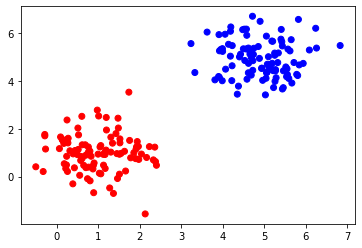

In [2]:
N1 = 100
N2 = 100
K = 2
sigma = 0.5

mean = (1,1)
cov = [[sigma,0],[0,sigma]]
X1 = np.random.multivariate_normal(mean,cov,N1)
c1 = ['red']*len(X1)

mean = (5,5)
cov = [[sigma,0],[0,sigma]]
X2 = np.random.multivariate_normal(mean,cov,N2)
c2 = ['blue']*len(X2)

X = np.concatenate((X1,X2))
color = np.concatenate((c1,c2))

T = 0* np.ones([len(X),K])
for n in range(0,len(X)):
    if (n<len(X1)):
        T[n][0] = 1
    if (n>=N1 and n<len(X1)+len(X2)):
        T[n][1] = 1
T = T.astype(int)

plt.scatter(X[:,0],X[:,1],marker='o',c=color)
plt.show()

2.Based on the code above, generate data similar to: 

In [3]:
N1 = 100
N2 = 100
N3 = 100
K = 3
sigma = 0.25

mean = (1,1)
cov = [[sigma,0],[0,sigma]]
X1 = np.random.multivariate_normal(mean,cov,N1)
c1 = ['red']*len(X1)

mean = (8,3)
cov = [[sigma,0],[0,sigma]]
X2 = np.random.multivariate_normal(mean,cov,N2)
c2 = ['blue']*len(X2)

mean = (3,8)
cov = [[sigma,0],[0,sigma]]
X3 = np.random.multivariate_normal(mean,cov,N3)
c3 = ['blue']*len(X3)

In [4]:
print(np.size(X1,0),np.size(X1,1))

100 2


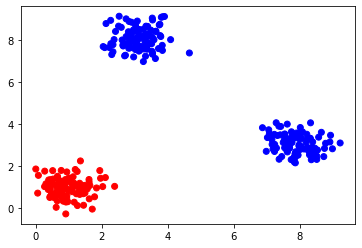

In [5]:
X = np.concatenate((X1,X2,X3))
color = np.concatenate((c1,c2,c3))
T = 0* np.ones([len(X),K])
for n in range(0,len(X)):
    if (n<len(X1)):
        T[n][0] = 0
    if (n>=N1 and n<len(X1)+len(X2)):
        T[n][1] = 1
    if (n>=(N1+N2) and n<(len(X1)+len(X2)+len(X3))):
        T[n][2] = 1
T = T.astype(int)

plt.scatter(X[:,0],X[:,1],marker='o',c=color)
plt.show()

3.Implement the predictive distribution, where the output is a decision whether a given point belongs to C1 or C2. Based in the generated data and your implementation, compute the probability map: 

In [6]:
def gaussian(x,mu,s):
    return np.exp(-1*((x[0]-mu)**2+(x[1]-mu)**2)/(2*s*s))

def sigmoid(x):
    N=len(x)
    y=np.zeros(N)
    for i in range(0,N):
        y[i]=1/(1+np.exp(-x[i]))
    return y

# def MAP_fit(x,t,M,S,alpha,w,Sold,m0):
# #     iS0=1/alpha*np.eye(M)
# #     m0=0
    
#     N=len(x)
#     phi=np.zeros([N,M-1])
#     for n in range(0,N):
#         mu=0
#         for m in range(0,M-1):
#             mu += S
#             phi[n,m]=gaussian(x[n,:],mu,S)
            
#     phi0=np.matrix(np.ones([N,1]))
#     #print(phi0.shape,phi.shape)
#     phi=np.concatenate((phi0,phi),axis=1)
#     #print(X.shape) 
                   
#     newton_times=100
#     deltaE0=np.dot(iS0,w0)
#     #print(deltaE0)
#     for i in range(0,newton_times):
#         #print("%d times"%i)
        
#         y=np.zeros([N,1])
#         #y=np.matrix(y)
#         #print(y.shape)
#         for n in range(0,N):
#             #phi_x=np.matrix(phi[n,:])
#             #print(w.shape,phi_x.shape)
#             y[n]=np.dot(w.T,phi[n,:].T)
        
# #         print(y.shape)
#         delta=sigmoid(y)
# #         print(delta)
#         Rnn=np.dot(delta,(1-delta).T)
#         Rnn=np.dot(Rnn,np.eye(N))
#         #print(Rnn.shape)
#         R=np.dot(phi.T,np.dot(Rnn,phi))  
#         #print(R)
#         H=linalg.inv(Sold)+R
        
#         deltaE1=np.dot(linalg.inv(Sold),(w-m0))
#         #m0=w
#         #print("deltaE1",deltaE1.shape)
#         t=np.matrix(t)
#         #print("t",t.shape)
#         p=y-t.T
#         #print("p",p.shape)
#         deltaE2=phi.T*p
#         #print("deltaE2",deltaE2.shape)
#         deltaE=deltaE1+deltaE2
#         #print(deltaE.shape)
#         w=w-np.dot(linalg.inv(H),deltaE)
#         #print(w.shape)
#     wmap=w
#     #print(deltaE1)
#     #print(deltaE2)
#     Sn=H
    
#     return wmap,Sn

def Phi(x,M,S):
    X = np.column_stack((gaussian(x, mu_j, S) for mu_j in range(0,M*S,S)))
#     X=np.ones([M,1])
#     mu=0
#     for i in range(1,M):
#         mu += S
#         X[i]=gaussian(x,mu,S)
    return X.T
    
def Pred(x,wmap,Sn,M,S):
    X=Phi(x,M,S)
    amap=np.dot(wmap.T,X)
    sig=np.dot(X.T,np.dot(Sn,X))
    operator=amap/ma.pow((1+ma.pi/8*sig),0.5)
    return sigmoid(operator)
    
def MAP_plot(x,y,w,M,S,Sn,X,color):
    N=len(x)
    p=np.zeros((N,N))
    for i in range(0,N):
        for j in range(0,N):
            p[i,j]=Pred([x[i],y[j]],w,Sn,M,S)
    xx,yy=np.meshgrid(x,y)
    #print(xx)
    
    fig,ax=plt.subplots()
#     im = ax.imshow(p, vmin=0, vmax=1)
    c=ax.pcolormesh(xx,yy,p.T,cmap='jet')
    fig.colorbar(c,ax=ax)
    plt.scatter(X[:,0],X[:,1],marker='o',c=color)
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
#     X=np.ones([N,M])
#     for n in range(0,N):
#         mu=0
#         for m in range(1,M):
#             mu+=S
#             X[n,m]=gaussian(x[n],mu,S)
    
#     y=np.dot(X,w)
#     ax.plot(x,y,'--k')
    plt.show()
            
# def MAP_plot2D(x,y,w,M,S,Sn):
#     N=len(x)
#     p=np.zeros((N,N))
#     for i in range(0,N):
#         for j in range(0,N):
#             p_x=Pred(x[i],y[j],w[0],Sn,M,S)
#             p_y=Pred(y[i],x[j],w[1],Sn,M,S)
#             p[i,j]=p_x+p_y
#     xx,yy=np.meshgrid(x,y)
#     #print(xx)
    
#     fig,ax=plt.subplots()
#     c=ax.pcolormesh(xx,yy,p.T,cmap='jet')
#     fig.colorbar(c,ax=ax)
#     #plt.scatter(X[:,0],X[:,1],marker='o',c=color)
#     X=np.ones([N,M])
#     for n in range(0,N):
#         mu=0
#         for m in range(1,M):
#             mu+=S
#             X[n,m]=gaussian(x[n],mu,S)
    
# #     y=np.dot(X,w)
# #     ax.plot(x,y,'--k')
#     plt.show()
    
def map_fit(S0,m0,w,x,t,M,S):
    for i in range(0,100):
        w_old = w
        phi_x=Phi(x,M,S)
#         print("phi_x",phi_x.shape)
        delta = sigmoid(np.dot(w_old.T,phi_x))
        R = delta*(1-delta)
#         print(R.shape)
        RR=np.matrix(np.dot(R,phi_x.T))
#         print(RR.shape)
        H = linalg.inv(S0)+np.dot(phi_x,RR)
        sN = H
        delta_E = np.dot(linalg.inv(S0),(w_old-m0))+np.matrix(np.dot(phi_x,(delta-t))).T
#         print("deltaE1",np.dot(linalg.inv(S0),(w_old-m0)).shape)
#         print("deltaE2",np.matrix(np.dot(phi_x,(delta-t))).shape)
#         print("deltaE",delta_E.shape)
        w = w_old-np.dot(linalg.inv(H),delta_E)
#         print("w",w.shape)
        
    return w,sN

In [7]:
T = 0* np.ones([len(X),2])
for n in range(0,len(X)):
    if (n<len(X1)):
        T[n][0] = 1
    if (n>=N1 and n<len(X1)+len(X2)):
        T[n][1] = 1
    if (n>=(N1+N2) and n<(len(X1)+len(X2)+len(X3))):
        T[n][1] = 1
T = T.astype(int)
t=T[:,1]

M=3
S=3
alpha=20

N=len(X)
w0=0*np.ones([M,1])
iS0=1/alpha*np.eye(M)
S0=linalg.inv(iS0)
m0=0
w=w0
for n in range(0,N):
    X_input=X[n,:]
    t_input=t[n]
    [w,Sn]=map_fit(S0,m0,w,X_input,t_input,M,S)
    m0=w
    S0=Sn
    
wmap=w
print(wmap,Sn)
# [w,Sn]=MAP_fit(X,t,M,S,alpha,w0,S0,m0)
# wmap=w
# print(wmap,Sn)

/var/folders/l5/222hwgzd5nz4v415zl9k5_5w0000gn/T/ipykernel_80195/3286676129.py:73: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.column_stack((gaussian(x, mu_j, S) for mu_j in range(0,M*S,S)))


[[-4.76865632]
 [-0.08313759]
 [ 9.05488826]] [[ 5.40211637 -5.69463002  2.79092458]
 [-5.69463002  9.63557904 -4.66300643]
 [ 2.79092458 -4.66300643  3.7567089 ]]


/var/folders/l5/222hwgzd5nz4v415zl9k5_5w0000gn/T/ipykernel_80195/3286676129.py:73: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.column_stack((gaussian(x, mu_j, S) for mu_j in range(0,M*S,S)))


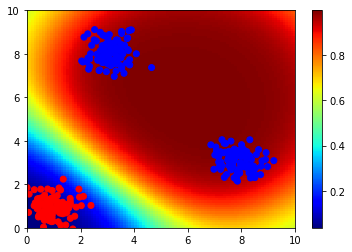

In [8]:
x_ts=np.linspace(0,10,100)
y_ts=np.linspace(0,10,100)

MAP_plot(x_ts,y_ts,wmap,M,S,Sn,X,color)

4.Ask the user to enter any new value of x, and your task is to provide the decision whether it belongs to C1 or C2, and its uncertainty information.

In [9]:
x_in_1 = float(input("Give a new test point, x1=:"))
x_in_2 = float(input("x2=:"))
x_in = [x_in_1,x_in_2]
x_in_p=Pred(x_in,wmap,Sn,M,S)

if x_in_p >= 0.5:
    print("test point belongs to group 1 P = %f"%x_in_p)
else:
    print("test point belongs to group 2 P = %f"%(1-x_in_p))

Give a new test point, x1=:4
x2=:2
test point belongs to group 1 P = 0.708668


/var/folders/l5/222hwgzd5nz4v415zl9k5_5w0000gn/T/ipykernel_80195/3286676129.py:73: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.column_stack((gaussian(x, mu_j, S) for mu_j in range(0,M*S,S)))
